# Udacity - Data Science Nanodegree
# Explore Weather Trends
Submission by: Sharook 

The SQL query used to extract the data:
   
   City Data (my location is Bethel, CT):
       
       SELECT *     
       FROM city_data
       WHERE city = 'New York';
   
   Global Data:
       
       SELECT *
       FROM global_data;

All other data manipulation is done in this notebook with Python 3.

In [4]:
#libraries
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import data
city_data = pd.read_csv('city_data.csv')
global_data  = pd.read_csv('global_data.csv')

In [6]:
#preview
print("-"*15)
print (city_data.info())
print("-"*15)
print (global_data.info())
print("-"*15)

---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
year        271 non-null int64
city        271 non-null object
country     271 non-null object
avg_temp    266 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB
None
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB
None
---------------


In [7]:
#find blanks
print("-"*15)
print('null city columns:\n', city_data.isnull().sum())
print("-"*15)
print('null global columns:\n', global_data.isnull().sum())
print("-"*15)


---------------
null city columns:
 year        0
city        0
country     0
avg_temp    5
dtype: int64
---------------
null global columns:
 year        0
avg_temp    0
dtype: int64
---------------


In [8]:
#remove blanks from city_data to match row quantity in global_data
city_data.dropna(inplace=True)

In [9]:
#check
print("-"*15)
print('null city columns:\n', city_data.isnull().sum())
print("-"*15)
print (city_data.info())
print("-"*15)

---------------
null city columns:
 year        0
city        0
country     0
avg_temp    0
dtype: int64
---------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 270
Data columns (total 4 columns):
year        266 non-null int64
city        266 non-null object
country     266 non-null object
avg_temp    266 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.4+ KB
None
---------------


In [10]:
#calculate the moving average for both datasets
#used a 10 year average for visualization, it'll add some pronunciation to
#the differences since there's such a long span of time
city_data['MA'] = city_data['avg_temp'].rolling(10).mean()
global_data['MA'] = global_data['avg_temp'].rolling(10).mean()
city_data.head(15)

,year,city,country,avg_temp,MA
0,1743,New York,United States,3.26,NaN
1,1744,New York,United States,11.66,NaN
2,1745,New York,United States,1.13,NaN
7,1750,New York,United States,10.07,NaN
8,1751,New York,United States,10.79,NaN
9,1752,New York,United States,2.81,NaN
10,1753,New York,United States,9.52,NaN
11,1754,New York,United States,9.88,NaN
12,1755,New York,United States,6.61,NaN
13,1756,New York,United States,9.94,7.567


In [11]:
#check that the MA doesn't start till year 10
global_data.head(15)

,year,avg_temp,MA
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


In [12]:
#remove the first 9 rows without moving average and check
city_data.dropna(inplace=True)
global_data.dropna(inplace=True)
print("-"*15)
print('null city columns:\n', city_data.isnull().sum())
print("-"*15)
print('null global columns:\n', global_data.isnull().sum())
print("-"*15)

---------------
null city columns:
 year        0
city        0
country     0
avg_temp    0
MA          0
dtype: int64
---------------
null global columns:
 year        0
avg_temp    0
MA          0
dtype: int64
---------------


In [13]:
#check for matching row counts
print("-"*15)
print (city_data.info())
print("-"*15)
print (global_data.info())
print("-"*15)

---------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 13 to 270
Data columns (total 5 columns):
year        257 non-null int64
city        257 non-null object
country     257 non-null object
avg_temp    257 non-null float64
MA          257 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.0+ KB
None
---------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 9 to 265
Data columns (total 3 columns):
year        257 non-null int64
avg_temp    257 non-null float64
MA          257 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.0 KB
None
---------------


In [14]:
#format data for merging, drop the city and country columns
city_data.drop(['city', 'country'], axis = 1, inplace = True)
#check
city_data.head(5)

,year,avg_temp,MA
13,1756,9.94,7.567
14,1757,8.89,8.130
15,1758,8.15,7.779
16,1759,9.01,8.567
17,1760,7.73,8.333


In [15]:
#merge the dataframes with 'years' as the key column
new_data = pd.merge(city_data, global_data, how = 'inner', on = 'year')
#check
new_data.head(5)

,year,avg_temp_x,MA_x,avg_temp_y,MA_y
0,1759,9.01,8.567,7.99,8.030
1,1760,7.73,8.333,7.19,7.877
2,1761,10.18,8.272,8.77,7.956
3,1762,9.55,8.946,8.61,8.239
4,1763,7.23,8.717,7.50,8.150


In [16]:
#rename columns for reading the graphs
new_data.rename(index=str, columns={'avg_temp_x':'City_Temp','MA_x':'City_MA', 'avg_temp_y':'Global_Temp','MA_y':'Global_MA'}, inplace = True)
#check
new_data.head(1)

,year,City_Temp,City_MA,Global_Temp,Global_MA
0,1759,9.01,8.567,7.99,8.03


In [17]:
#remove first row (starts at 1759) and select every decade
decades = new_data.iloc[1::10]
decades.head(10)

,year,City_Temp,City_MA,Global_Temp,Global_MA
1,1760,7.73,8.333,7.19,7.877
11,1770,9.04,9.089,7.69,8.032
21,1781,9.79,8.449,8.10,8.597
31,1791,9.37,9.075,8.23,8.008
41,1801,10.00,9.394,8.59,8.423
51,1811,9.43,9.625,6.86,7.968
61,1821,8.53,8.411,8.09,7.445
71,1831,9.07,9.642,7.64,8.229
81,1841,9.00,8.790,7.69,7.671
91,1851,9.26,9.220,8.18,8.037


In [18]:
#year 1780 is missing from dataset, 
#format to exclude years <1780 for consistancy
#there's still plenty of data
decades = decades.iloc[2::]
decades.head(10)

,year,City_Temp,City_MA,Global_Temp,Global_MA
21,1781,9.79,8.449,8.10,8.597
31,1791,9.37,9.075,8.23,8.008
41,1801,10.00,9.394,8.59,8.423
51,1811,9.43,9.625,6.86,7.968
61,1821,8.53,8.411,8.09,7.445
71,1831,9.07,9.642,7.64,8.229
81,1841,9.00,8.790,7.69,7.671
91,1851,9.26,9.220,8.18,8.037
101,1861,9.47,9.100,7.85,8.038
111,1871,8.94,9.034,8.12,8.156


In [19]:
#plot the City and Global MA vs year
#decades.plot('year', 'City_MA', color='red', label = 'NYC Average')
#plt.xlabel('Year')
#plt.ylabel("Temperatur in Celsius")
#decades.plot('year', 'Global_MA', color='blue', label = 'World Average')
#plt.xlabel('Year')
#plt.ylabel("Temperatur in Celsius")

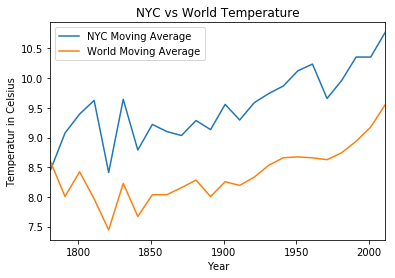

In [20]:
decades.drop(['City_Temp', 'Global_Temp'], axis = 1, inplace = True)
plot = decades.plot.line(x = 'year', sharey = ['City_MA', 'Global_MA'], title = 'NYC vs World Temperature', legend = True)
plt.xlabel('Year')
plt.ylabel("Temperatur in Celsius")
L = plt.legend()
L.get_texts()[0].set_text('NYC Moving Average')
L.get_texts()[1].set_text('World Moving Average')

Oberservations:

1. Both graphs overall show an upward trend in average temperature across the two centuries, although NYC 
is increasing more quickly.

2. The average increase of about one degree celsius in NYC vs the World  as we reach the 21st century is possibly 
due to the nature of a metropolitan city, containing industries and vast populations of people. Where the World average
is going to contain data from less dense and thriving areas, especially in the nineteenth century. This difference
would probably be even more prevalent if the World data included remote, rural, or otherwise less industrialized
regions. I would have to assume the World data was made up of each majority city that was available prior
to starting.

3. The first row of data is the 10 year moving average from 1791 - 1801. The two graphs start at approximately
the same location, about 8.5 degrees celsius. It's noticable from there though NYC is in an overall upward trend
where the world seems to be ending a reversal (if it were possible to have a millenium graph), 
dropping down to 7.5 degrees celcius around 1825 when NYC was around 8.5, but then starting to follow the same trend as NYC.

4. Both the World and NYC average temperature is increasing more quickly  over the last half century. As the world's
popululation is continuing to increase and with the lack of any serious effort to stop green-house gases and overall 
pollution, this trend is likely to continue in the future. 